# Obesity risk factors classification

In [1]:
# import the nescessary libraries
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import naive_bayes
from sklearn import svm
from sklearn import ensemble
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [2]:
#importing the dataset
file_path = 'ObesityDataSet_raw_and_data_sinthetic.csv'
data = pd.read_csv(file_path)
data.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [3]:
#checking for the data size and types
print(data.dtypes)
print(data.shape)

Gender                             object
Age                               float64
Height                            float64
Weight                            float64
family_history_with_overweight     object
FAVC                               object
FCVC                              float64
NCP                               float64
CAEC                               object
SMOKE                              object
CH2O                              float64
SCC                                object
FAF                               float64
TUE                               float64
CALC                               object
MTRANS                             object
NObeyesdad                         object
dtype: object
(2111, 17)


### Data cleaning and processing

In [4]:
# checking for the null value in dataset
data.isnull().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

since there is no null value we can continue to data processing

In [5]:
# radomizing the order in dataset
data = data.sample(frac=1, random_state=45).reset_index(drop=True)

In [6]:
# seperating data into classes and variables
variables = data.iloc[:,: -1]
classes = data.iloc[:, -1]
variables.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,Female,37.631769,1.513202,75.410647,yes,yes,2.0,2.582591,Sometimes,no,1.535134,no,1.884520,0.000000,Sometimes,Automobile
1,Female,25.897815,1.664463,102.781971,yes,yes,3.0,3.000000,Sometimes,no,1.068493,no,0.112122,1.000000,Sometimes,Public_Transportation
2,Female,18.000000,1.620000,68.000000,no,no,2.0,1.000000,Sometimes,no,1.000000,no,0.000000,2.000000,no,Public_Transportation
3,Male,18.014333,1.751029,80.000000,yes,yes,2.0,2.805436,Sometimes,no,2.122884,no,0.045651,0.017225,Frequently,Public_Transportation
4,Male,23.083621,1.848553,121.421121,yes,yes,3.0,2.567567,Sometimes,no,2.011023,no,0.916478,0.000000,Sometimes,Public_Transportation


In [7]:
# since height and weight is a function of body type, we will drop these two variables to focus on the other risk factors
variables = variables.drop('Height', axis=1)
variables = variables.drop('Weight', axis=1)
variables.head()

,Gender,Age,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,Female,37.631769,yes,yes,2.0,2.582591,Sometimes,no,1.535134,no,1.884520,0.000000,Sometimes,Automobile
1,Female,25.897815,yes,yes,3.0,3.000000,Sometimes,no,1.068493,no,0.112122,1.000000,Sometimes,Public_Transportation
2,Female,18.000000,no,no,2.0,1.000000,Sometimes,no,1.000000,no,0.000000,2.000000,no,Public_Transportation
3,Male,18.014333,yes,yes,2.0,2.805436,Sometimes,no,2.122884,no,0.045651,0.017225,Frequently,Public_Transportation
4,Male,23.083621,yes,yes,3.0,2.567567,Sometimes,no,2.011023,no,0.916478,0.000000,Sometimes,Public_Transportation


In [8]:
# encoding variable into binomial and numerical value
var_encoding = {'Gender':                         {'Male': 0, 'Female': 1},
                'family_history_with_overweight': {'yes': 1, 'no': 0},
                'FAVC':                           {'yes': 1, 'no': 0},
                'CAEC':                           {'no': 0, 'Sometimes': 1,
                                                  'Frequently': 2, 'Always': 3},
                'SMOKE':                          {'yes': 1, 'no': 0},
                'SCC':                            {'yes': 1, 'no': 0},
                'CALC':                           {'no': 0, 'Sometimes': 1,
                                                  'Frequently': 2, 'Always': 3}}
variables = variables.replace(var_encoding)
variables.head()

,Gender,Age,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,1,37.631769,1,1,2.0,2.582591,1,0,1.535134,0,1.884520,0.000000,1,Automobile
1,1,25.897815,1,1,3.0,3.000000,1,0,1.068493,0,0.112122,1.000000,1,Public_Transportation
2,1,18.000000,0,0,2.0,1.000000,1,0,1.000000,0,0.000000,2.000000,0,Public_Transportation
3,0,18.014333,1,1,2.0,2.805436,1,0,2.122884,0,0.045651,0.017225,2,Public_Transportation
4,0,23.083621,1,1,3.0,2.567567,1,0,2.011023,0,0.916478,0.000000,1,Public_Transportation


In [9]:
# for MTRANS, we will use one-hot encoding method since their is no linear relationship between each variables
mtrans = pd.get_dummies(variables['MTRANS'])
mtrans.head()

,Automobile,Bike,Motorbike,Public_Transportation,Walking
0,1,0,0,0,0
1,0,0,0,1,0
2,0,0,0,1,0
3,0,0,0,1,0
4,0,0,0,1,0


In [10]:
# combining the encoded MTRANS with the rest of the variables
variables = variables.drop('MTRANS', axis=1)
variables = pd.concat([variables, mtrans], axis=1)
variables.head()

,Gender,Age,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,Automobile,Bike,Motorbike,Public_Transportation,Walking
0,1,37.631769,1,1,2.0,2.582591,1,0,1.535134,0,1.884520,0.000000,1,1,0,0,0,0
1,1,25.897815,1,1,3.0,3.000000,1,0,1.068493,0,0.112122,1.000000,1,0,0,0,1,0
2,1,18.000000,0,0,2.0,1.000000,1,0,1.000000,0,0.000000,2.000000,0,0,0,0,1,0
3,0,18.014333,1,1,2.0,2.805436,1,0,2.122884,0,0.045651,0.017225,2,0,0,0,1,0
4,0,23.083621,1,1,3.0,2.567567,1,0,2.011023,0,0.916478,0.000000,1,0,0,0,1,0


In [11]:
# due to the limited data size, we will simplify the classes to make the task more managable for the algorityms
cla_encoding = {'Overweight_Level_I': 'Overweight',
               'Overweight_Level_II': 'Overweight',
               'Obesity_Type_I':      'Obesity',
               'Obesity_Type_II':     'Obesity',
               'Obesity_Type_III':    'Obesity'}
classes = classes.replace(cla_encoding)
classes.head()

0       Obesity
1       Obesity
2    Overweight
3    Overweight
4       Obesity
Name: NObeyesdad, dtype: object

## Classification

In [12]:
# creating a train test split
X_train, X_test, y_train, y_test = train_test_split(variables, classes, test_size=0.2, random_state=0)

### Naive Bayes classifier

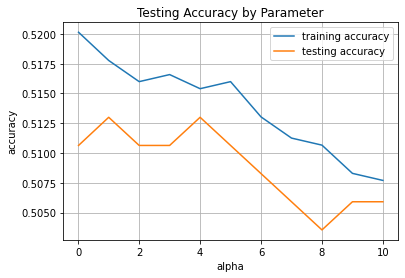

In [13]:
# mapping out the effect of parameters to accuracy
training_accuracy = []
testing_accuracy = []
alphas = [0.01, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
for i in alphas:
    classifier = naive_bayes.MultinomialNB(alpha=i)
    classifier.fit(X_train, y_train)
    training_accuracy.append(accuracy_score(y_train,
                                            classifier.predict(X_train)))
    testing_accuracy.append(accuracy_score(y_test,
                                           classifier.predict(X_test)))
plt.figure()
plt.plot(alphas, training_accuracy, label='training accuracy')
plt.plot(alphas, testing_accuracy, 
             label='testing accuracy')
plt.title('Testing Accuracy by Parameter')
plt.xlabel('alpha')
plt.ylabel('accuracy')
plt.legend()
plt.grid()

In [14]:
#creating a classifier
nb_classifier = naive_bayes.MultinomialNB(alpha=1)

In [15]:
#training the model
nb_classifier.fit(X_train, y_train)

MultinomialNB(alpha=1)

In [16]:
# timing the processing time
%timeit nb_classifier.fit(X_train, y_train)

5.31 ms ± 311 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [17]:
# testing for in-sample and off-sample accuracy
nb_y_train = nb_classifier.predict(X_train)
nb_y_test = nb_classifier.predict(X_test)
nb_train_acc = accuracy_score(y_train, nb_y_train)
nb_test_acc = accuracy_score(y_test, nb_y_test)
print('The training accuracy is:', nb_train_acc)
print('The testing accuracy is:', nb_test_acc)

The training accuracy is: 0.5177725118483413
The testing accuracy is: 0.5130023640661938


In [18]:
# 5-folds crossvalidation
nb_5_folds = cross_val_score(nb_classifier, variables, classes, cv=5)
nb_5_folds_mean = nb_5_folds.mean()
nb_5_folds_var = nb_5_folds.var()
print('the 5-folds crossvalidation accuracy scores are:', nb_5_folds)
print('the 5-folds crossvalidation mean score is:', nb_5_folds_mean)
print('the 5-folds crossvalidation varience is:', nb_5_folds_var)

the 5-folds crossvalidation accuracy scores are: [0.50591017 0.50236967 0.52132701 0.492891   0.51895735]
the 5-folds crossvalidation mean score is: 0.5082910378362632
the 5-folds crossvalidation varience is: 0.00011231985835337757


Text(91.68, 0.5, 'predicted label')

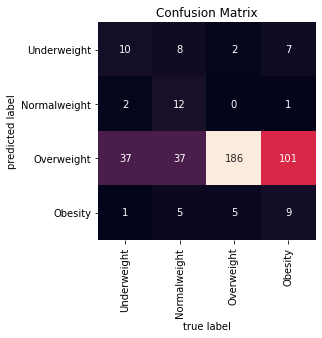

In [19]:
# creating a confusion matrix
nb_matrix = confusion_matrix(y_test,nb_y_test)
labels = ['Underweight', 'Normalweight', 'Overweight', 'Obesity']
sns.heatmap(nb_matrix.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix')
plt.xlabel('true label')
plt.ylabel('predicted label')

### Support Vector Machine Classifier

In [20]:
# mapping out the effect of parameters to accuracy
gammas = [0.01, 0.1]
kernels = ['linear', 'rbf', 'poly']
acc_df = pd.DataFrame(columns=gammas, index=kernels)
for i in kernels:
    for j in gammas:
        classifier = svm.SVC(kernel=i, gamma=j, random_state=45)
        classifier.fit(X_train, y_train)
        score = accuracy_score(y_test, classifier.predict(X_test))
        acc_df.loc[i, j] = score

acc_df = acc_df.astype('float')

Text(33.0, 0.5, 'gammas')

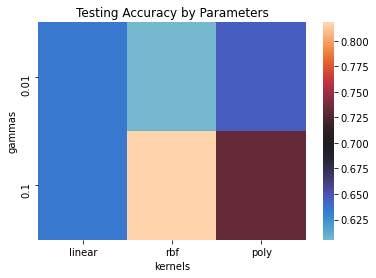

In [21]:
sns.heatmap(acc_df.T, center=0.7)
plt.title('Testing Accuracy by Parameters')
plt.xlabel('kernels')
plt.ylabel('gammas')

In [22]:
#creating a classifier
svm_classifier = svm.SVC(kernel='rbf', gamma=0.1, random_state=45)

In [23]:
#training the model
svm_classifier.fit(X_train, y_train)

SVC(gamma=0.1, random_state=45)

In [24]:
# timing the processing time
%timeit svm_classifier.fit(X_train, y_train)

105 ms ± 621 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [25]:
# testing for in-sample and off-sample accuracy
svm_y_train = svm_classifier.predict(X_train)
svm_y_test = svm_classifier.predict(X_test)
svm_train_acc = accuracy_score(y_train, svm_y_train)
svm_test_acc = accuracy_score(y_test, svm_y_test)
print('The training accuracy is:', svm_train_acc)
print('The testing sample accuracy is:', svm_test_acc)

The training accuracy is: 0.8590047393364929
The testing sample accuracy is: 0.817966903073286


In [26]:
# 5-folds crossvalidation
svm_5_folds = cross_val_score(svm_classifier, variables, classes, cv=5)
svm_5_folds_mean = svm_5_folds.mean()
svm_5_folds_var = svm_5_folds.var()
print('the 5-folds crossvalidation accuracy scores are:', svm_5_folds)
print('the 5-folds crossvalidation mean score is:', svm_5_folds_mean)
print('the 5-folds crossvalidation varience is:', svm_5_folds_var)

the 5-folds crossvalidation accuracy scores are: [0.77777778 0.80094787 0.82701422 0.79620853 0.80331754]
the 5-folds crossvalidation mean score is: 0.801053185887309
the 5-folds crossvalidation varience is: 0.00024886577315019363


Text(91.68, 0.5, 'predicted label')

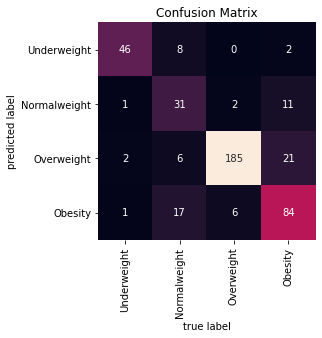

In [27]:
# creating a confusion matrix
svm_matrix = confusion_matrix(y_test,svm_y_test)
labels = ['Underweight', 'Normalweight', 'Overweight', 'Obesity']
sns.heatmap(svm_matrix.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix')
plt.xlabel('true label')
plt.ylabel('predicted label')

### Random Forest Classifier

In [28]:
# mapping out the effect of parameters to accuracy
acc_df = pd.DataFrame(columns=range(10 , 101, 10), index=range(10 , 101, 10))

for i in range(10 , 101, 10):
    for j in range(10 , 101, 10):
        classifier = ensemble.RandomForestClassifier(n_estimators=i, max_depth=j, random_state=30)
        classifier.fit(X_train, y_train)
        score = accuracy_score(y_test, classifier.predict(X_test))
        acc_df.loc[i, j] = score

acc_df = acc_df.astype('float')

Text(33.0, 0.5, 'tree depth')

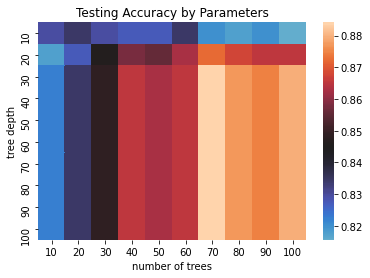

In [29]:
sns.heatmap(acc_df.T, center=0.845)
plt.title('Testing Accuracy by Parameters')
plt.xlabel('number of trees')
plt.ylabel('tree depth')

In [30]:
#creating a classifier
rf_classifier  = ensemble.RandomForestClassifier(n_estimators=70, max_depth=30, random_state=30)

In [31]:
#training the model
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(max_depth=30, n_estimators=70, random_state=30)

In [32]:
# timing the processing time
%timeit rf_classifier.fit(X_train, y_train)

152 ms ± 2.03 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [33]:
# testing for in-sample and off-sample accuracy
rf_y_train = rf_classifier.predict(X_train)
rf_y_test = rf_classifier.predict(X_test)
rf_train_acc = accuracy_score(y_train, rf_y_train)
rf_test_acc = accuracy_score(y_test, rf_y_test)
print('The training is:', rf_train_acc)
print('The testing accuracy is:', rf_test_acc)

The training is: 1.0
The testing accuracy is: 0.8841607565011821


In [34]:
# 5-folds crossvalidation
rf_5_folds = cross_val_score(rf_classifier, variables, classes, cv=5)
rf_5_folds_mean = rf_5_folds.mean()
rf_5_folds_var = rf_5_folds.var()
print('the 5-folds crossvalidation accuracy scores are:', rf_5_folds)
print('the 5-folds crossvalidation mean score is:', rf_5_folds_mean)
print('the 5-folds crossvalidation varience is:', rf_5_folds_var)

the 5-folds crossvalidation accuracy scores are: [0.8463357  0.87677725 0.86255924 0.87203791 0.87440758]
the 5-folds crossvalidation mean score is: 0.8664235375841709
the 5-folds crossvalidation varience is: 0.00012418394035352594


Text(91.68, 0.5, 'predicted label')

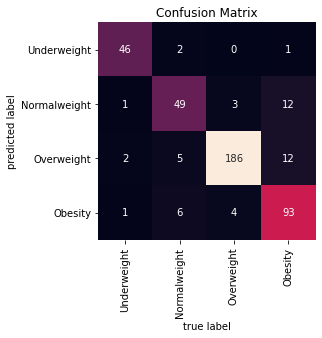

In [35]:
# creating a confusion matrix
rf_matrix = confusion_matrix(y_test,rf_y_test)
labels = ['Underweight', 'Normalweight', 'Overweight', 'Obesity']
sns.heatmap(rf_matrix.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix')
plt.xlabel('true label')
plt.ylabel('predicted label')